__Profiles__

In this example, we'll create a grid of Cartesian (y,x) coordinates and pass it to the 'light_profiles'  module to create images on this grid and the 'mass_profiles' module to create deflection-angle maps on this grid. 

In [ ]:
%matplotlib inline

from autolens.model.profiles import light_profiles
from autolens.model.profiles import mass_profiles
from autolens.data.array import grids
from autolens.model.profiles.plotters import profile_plotters

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


<IPython.core.display.Javascript object>

Lets use the a same grids as the previous tutorial (if you skipped that tutorial, I recommend you go back to it!)

In [ ]:
grid_stack = grids.GridStack.from_shape_pixel_scale_and_sub_grid_size(
    shape=(100, 100), pixel_scale=0.05, sub_grid_size=2
)

<IPython.core.display.Javascript object>

Next, lets create a light profile using the 'light_profiles' module. We'll use a Sersic function, which is a analytic function often use to depict galaxies. We can print the profile to confirm its parameters.

In [ ]:
sersic_light_profile = light_profiles.EllipticalSersic(
    centre=(0.0, 0.0),
    axis_ratio=0.8,
    phi=45.0,
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=2.5,
)

print(sersic_light_profile)

EllipticalSersic
centre: (0.0, 0.0)
axis_ratio: 0.8
phi: 45.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


<IPython.core.display.Javascript object>

We can pass a grid to a light profile to compute the intensity of at every coordinate on the grid. 

The resulting image can comes back on the 1D NumPy arrays as the grid.

In [ ]:
light_profile_intensities = sersic_light_profile.intensities_from_grid(
    grid=grid_stack.regular, return_in_2d=False
)

print("intensity of regular-grid pixel 0:")
print(light_profile_intensities[0])
print("intensity of regular-grid pixel 1:")
print(light_profile_intensities[1])
print()

intensity of regular-grid pixel 1:
0.033686436269567265
intensity of regular-grid pixel 2:
0.03480146593360767



<IPython.core.display.Javascript object>

The 1D flattening occurs from the top-left pixel, and goes rightwards and downwards. Thus, because the light profile is centered at (0.0, 0.0), the central pixels are the brightest.

In [ ]:
print("intensity of central regular-grid pixels:")
print(light_profile_intensities[4949])
print(light_profile_intensities[4950])
print(light_profile_intensities[5049])
print(light_profile_intensities[5050])

intensity of central regular-grid pixels:
29.609389476981296
33.037106303066714
33.037106303066714
29.609389476981296


<IPython.core.display.Javascript object>

Alternatively, the grid can come back in 2D.

In fact, on can use the 'return_in_2d' function to return pretty much *all* grid methods in 2D. This is the default behaviour, and how we'll return all arrays from here on!'

In [ ]:
light_profile_intensities = sersic_light_profile.intensities_from_grid(
    grid=grid_stack.regular, return_in_2d=True
)

print("intensity of central regular-grid pixels:")
print(light_profile_intensities[49, 49])
print(light_profile_intensities[49, 50])
print(light_profile_intensities[50, 49])
print(light_profile_intensities[50, 50])

intensity of central regular-grid pixels:
29.609389476981296
33.037106303066714
33.037106303066714
29.609389476981296


<IPython.core.display.Javascript object>

We can use a profile plotter to plot this intensity map (this maps the regular-grid to 2D before plotting).

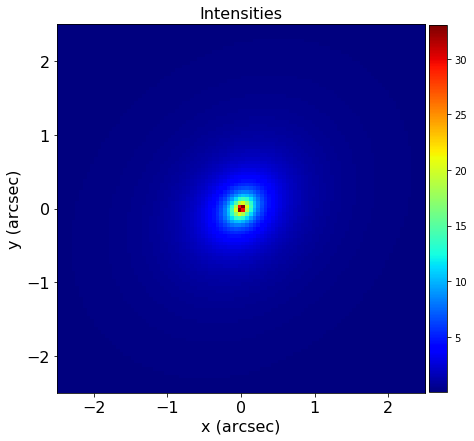

<IPython.core.display.Javascript object>

In [ ]:
profile_plotters.plot_intensities(
    light_profile=sersic_light_profile, grid=grid_stack.regular
)

Lets create a singular isothermal sphere (SIS) mass-profile using the 'mass-profiles' module.

In [ ]:
sis_mass_profile = mass_profiles.SphericalIsothermal(
    centre=(0.1, 0.1), einstein_radius=1.6
)

print(sis_mass_profile)

SphericalIsothermal
centre: (0.1, 0.1)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0


<IPython.core.display.Javascript object>

Just like above, we can pass a grid to a mass-profile to compute its deflection angles (still in 1D).

(If you are new to gravitiational lensing, and are unclear on what a 'deflection-angle' means or what it is used for, then I'll explain all in tutorial 4 of this chapter. For now, just look at the pretty pictures  they make, and worry about what they mean in tutorial 4!).

In [ ]:
mass_profile_deflections = sis_mass_profile.deflections_from_grid(
    grid=grid_stack.regular, return_in_2d=True
)

print("deflection-angles of regular-grid pixel 1:")
print(mass_profile_deflections[0, 0])
print("deflection-angles of regular-grid pixel 2:")
print(mass_profile_deflections[0, 1])
print()
print("deflection-angles of central regular-grid pixels:")
print(mass_profile_deflections[49, 49])
print(mass_profile_deflections[49, 50])
print(mass_profile_deflections[50, 49])
print(mass_profile_deflections[50, 50])

deflection-angles of regular-grid pixel 1:
[ 1.08477382 -1.17612319]
deflection-angles of regular-grid pixel 2:
[ 1.09622353 -1.1654587 ]

deflection-angles of central regular-grid pixels:
[-0.82319321 -1.37198868]
[-1.13137085 -1.13137085]
[-1.13137085 -1.13137085]
[-1.37198868 -0.82319321]


<IPython.core.display.Javascript object>

And again, a profile plotter can plot these deflection angles in 2D.

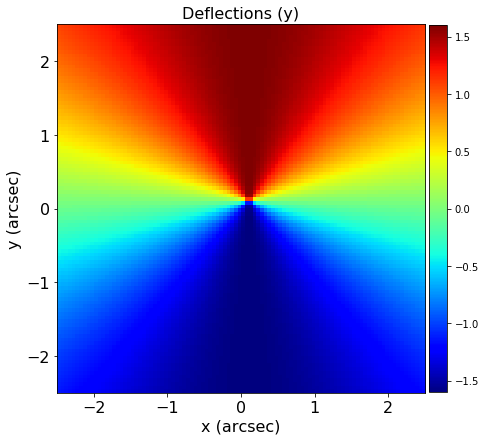

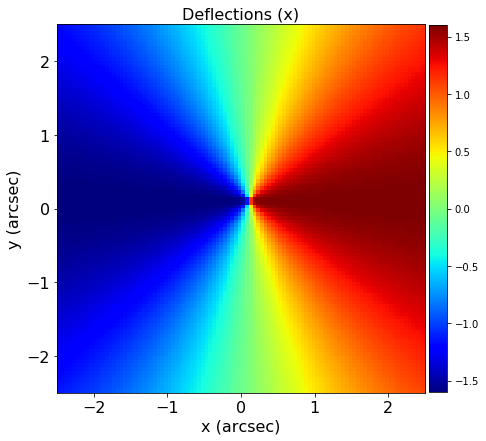

<IPython.core.display.Javascript object>

In [ ]:
profile_plotters.plot_deflections_y(
    mass_profile=sis_mass_profile, grid=grid_stack.regular
)

profile_plotters.plot_deflections_x(
    mass_profile=sis_mass_profile, grid=grid_stack.regular
)

Mass-profiles also have a convergence (dimensionless surface-density) and gravitational potential, which can be plotted in the same way.

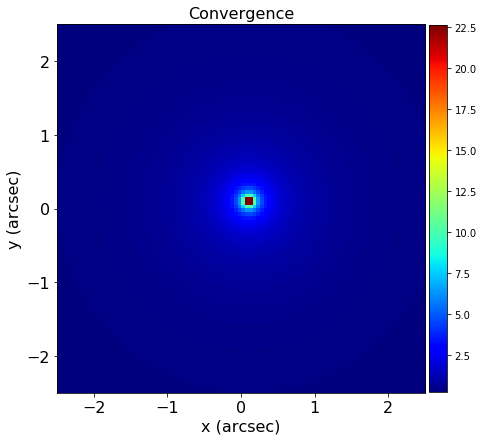

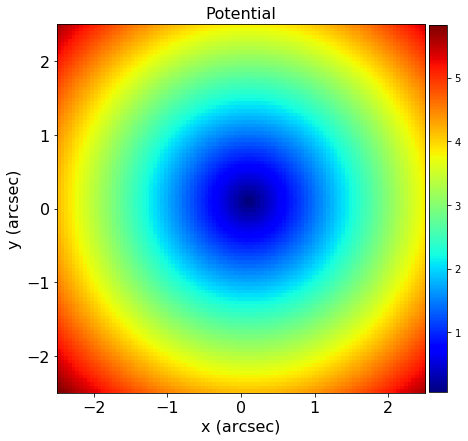

<IPython.core.display.Javascript object>

In [ ]:
mass_profile_convergence = sis_mass_profile.convergence_from_grid(
    grid=grid_stack.regular, return_in_2d=True
)

mass_profile_potential = sis_mass_profile.potential_from_grid(
    grid=grid_stack.regular, return_in_2d=True
)

profile_plotters.plot_convergence(
    mass_profile=sis_mass_profile, grid=grid_stack.regular
)

profile_plotters.plot_potential(mass_profile=sis_mass_profile, grid=grid_stack.regular)

Congratulations, you've completed your second PyAutoLens tutorial! Before moving on to the next one, experiment with PyAutoLens by doing the following:

1) Change the light profile's effective radius and Sersic index - how does the image's appearance change?

2) Change the mass profile's einstein radius - what happens to the deflection angles, potential and surface density?

3) Experiment with different light-profiles and mass-profiles in the light_profiles and mass_profiles modules. In particular, use the EllipticalIsothermal profile to introduce ellipticity into a mass profile.